In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic/train.csv')

In [3]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
744,745,1,3,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.9250,NaN,S
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0,2,2668,22.3583,NaN,C
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
202,203,0,3,"Johanson, Mr. Jakob Alfred",male,34.0,0,0,3101264,6.4958,NaN,S
833,834,0,3,"Augustsson, Mr. Albert",male,23.0,0,0,347468,7.8542,NaN,S
69,70,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S
408,409,0,3,"Birkeland, Mr. Hans Martin Monsen",male,21.0,0,0,312992,7.7750,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.loc[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [7]:
embarked = df.groupby('Embarked').count()['PassengerId']

In [9]:
embarked_max = embarked[embarked == embarked.max()].index[0]

In [11]:
df.loc[df['Embarked'].isnull(), 'Embarked'] = embarked_max

In [12]:
df.loc[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [17]:
df['Age'].median()

28.0

In [20]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.')
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [21]:
mapping = {'Don': 'RoyaltyM', 'Mme': 'Miss', 'Ms': 'Miss',
    'Major': 'Officer', 'Lady': 'RoyaltyF', 'Sir': 'RoyaltyM', 
    'Mlle': 'Miss', 'Col': 'Officer', 'Capt': 'Officer',
    'Countess': 'RoyaltyF', 'Jonkheer': 'RoyaltyM'}
df.replace({'Title': mapping}, inplace=True)
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'RoyaltyM', 'Rev', 'Dr', 'Officer',
       'RoyaltyF'], dtype=object)

In [29]:
age_med = df.groupby('Title')['Age'].median()
age_med

Title
Dr          46.5
Master       3.5
Miss        21.5
Mr          30.0
Mrs         35.0
Officer     56.0
Rev         46.5
RoyaltyF    40.5
RoyaltyM    40.0
Name: Age, dtype: float64

In [30]:
for title, age in age_med.iteritems():
    filter_age = df['Age'].isnull()
    filter_title = df['Title'] == title
    df.loc[(filter_age & filter_title), 'Age'] = age

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


<AxesSubplot:xlabel='Pclass'>

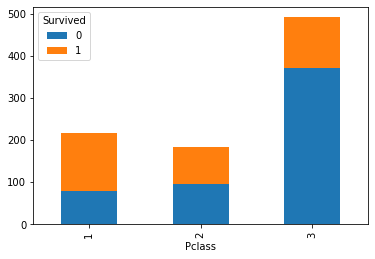

In [35]:
surv_pclass = df.pivot_table(values='PassengerId', index='Pclass', columns='Survived', aggfunc='count')
surv_pclass.plot(kind='bar', stacked=True)

In [40]:
surv_title = df.pivot_table(values='PassengerId', index='Title', columns='Survived', aggfunc='count')
surv_title

Survived,0,1
Title,,
Dr,4.0,3.0
Master,17.0,23.0
Miss,55.0,131.0
Mr,436.0,81.0
Mrs,26.0,99.0
Officer,3.0,2.0
Rev,6.0,NaN
RoyaltyF,NaN,2.0
RoyaltyM,2.0,1.0


<AxesSubplot:xlabel='Title'>

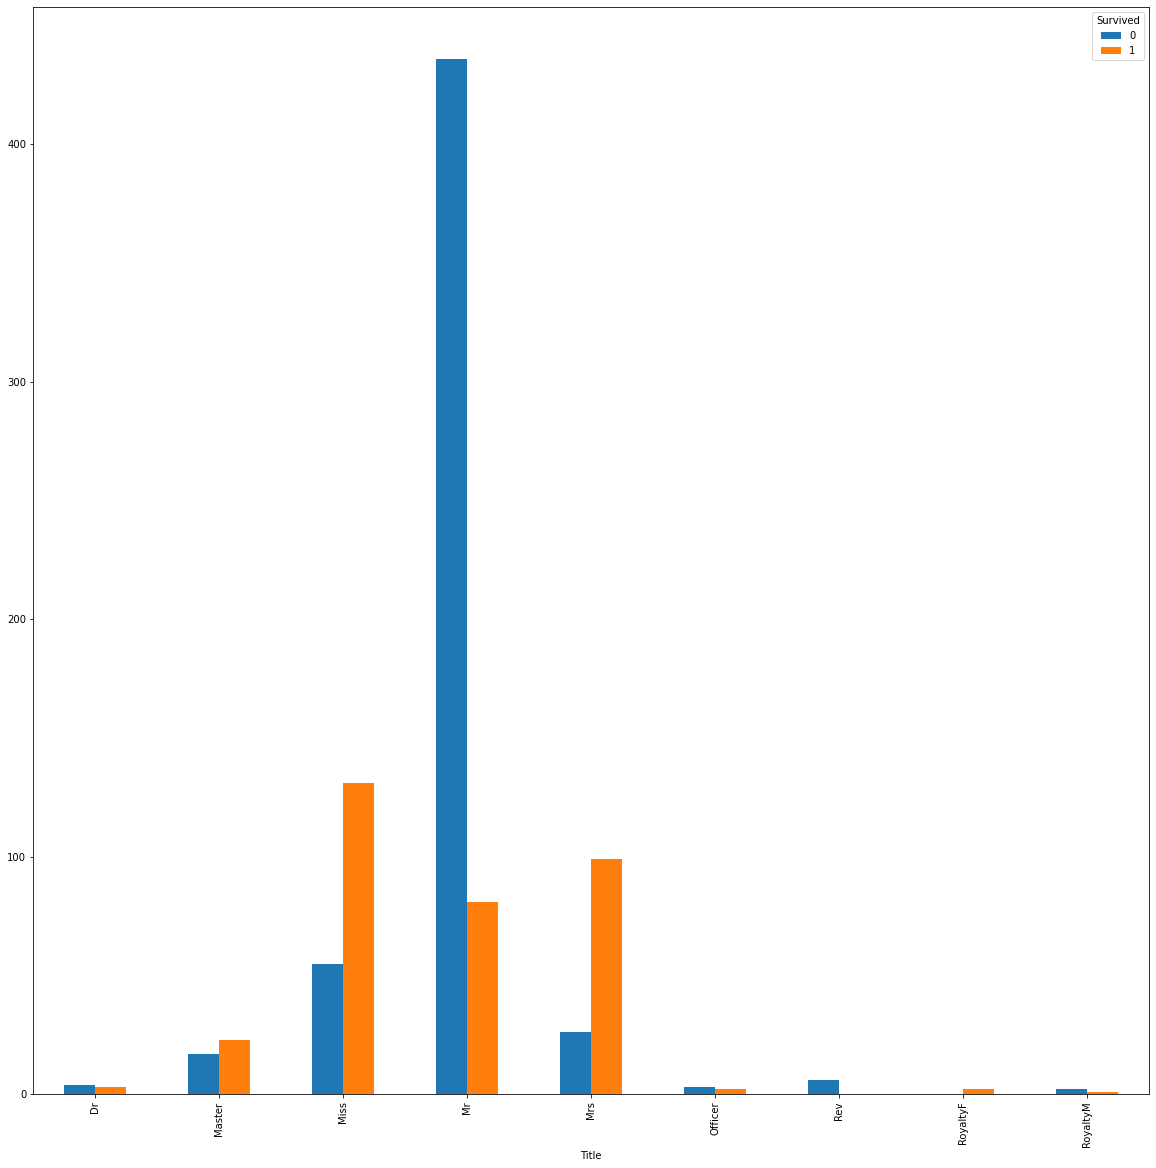

In [39]:
surv_title.plot(kind='bar', figsize=(20,20))